# Прикладная статистика в машинном обучении 2021-2022

## Домашнее задание #1

## Часть 2

### Дедлайн: 29 октября 2021 года, 23:59

**Правила игры**

1. Домашнее задание состоит из двух частей. Часть 1 содержит 13 обязательных и две бонусных задачи и предполагает решение «от руки». Часть 2 содержит 3 обязательных задачи и предполагает программное решение.


2. Домашнее задание оценивается в $80$ баллов. При этом часть 1 оценивается в $65$ баллов, а часть 2 – в $15$ баллов. По умолчанию за каждый пункт каждой задачи можно получить $1$ балл. Однако за некоторые пункты некоторых задач можно получить другое количество баллов, которое явно указано в скобках рядом с меткой пункта.


3. Каждый пункт оценивается с промежутком $0.5$. Например, если за пункт можно получить максимум $1$ балл, то за полностью корректное решение ставится $1$ балл, за решение с небольшими ошибками ставится $0.5$ балла, за решение с серьёзными ошибками или неправильное решение ставится $0$ баллов. Для пунктов, за которые можно получить максимум $2$ балла, в зависимости от решения можно получить $2$, $1.5$, $1$ и т.д. баллов. При этом пункты проверяются независимо друг от друга: если пункт $t+1$ зависит от численных результатов пункта $t$, и в пункте $t$ допускается ошибка, из-за которой в пункт $t+1$ приходят неверные входные данные, то при корректном решении пункт $t+1$ оценивается в максимальное количество баллов, которое можно за него получить.


4. Бонусные задачи $X$ и $Y$ приведены в конце части 1 и обозначены значком $\dagger$. Эти задачи необязательны к решению и учитываются сверх установленных $80$ баллов. Баллы за корректно решённые бонусные задачи прибавляются к набранным баллам, даже если в сумме получается больше $80$ баллов (оценка за домашнюю работу в этом случае будет больше 10, и так и будет внесена в таблицу с оценками).


5. Весь код должен быть написан на Python, R, C или C++.


6. Решения принимаются до **29 октября 2021 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, проверяются, но **не оцениваются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).


7. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/KZaAKjaA).


8. Репозиторий должен содержать: PDF-файл с решениями задач части 1 и файл с кодом с решениями задач части 2. Решение задач части 1 можно набрать в любом электронном редакторе или написать от руки, а затем сделать качественный скан. Все решения должны быть расположены в правильном порядке в одном файле. Файлы должны быть названы по типу «name\_surname\_group\_hw1\_part1.pdf» и «name\_surname\_group\_hw1\_part2.ext», где вместо ext может быть .py, .ipynb, .R, .c, .cpp. Если решение части 2 разбивается на несколько файлов кода, то в репозиторий нужно загрузить все файлы, а в README.md подробно указать, что содержит каждый файл. 


9. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.


10. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

---

#### Задача 14. Divide et impera!

Файле `14.csv` содержит данные, которые являются смесью гауссиан. 

**[a]** Постройте гистограмму выборки. Изучите гистограмму и сделайте предположения о количестве гауссиан, а также задайте разумный вектор начальных параметров $\theta$.

**[б]** **(3 балла)** Реализуйте EM-алгоритм для нахождения оценки $\hat{\theta}$. Итоговые формулы представьте только в виде кода (то есть не требуется отдельно прикладывать или техать вывод формул).

**[в]** Постройте график $Q$ в зависимости от числа итераций.

**[г]** Являются ли полученные оценки параметров адекватными (адекватность оцените визуально по гистограмме). Если нет, приведите возможную причину провала EM-алгоритма. 

In [33]:
import numpy as np
import pandas as pd

X = pd.read_csv('14.csv')

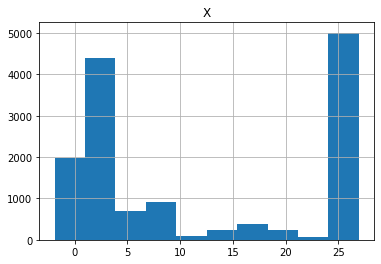

In [74]:
_ = X.hist('X')

Выглядит так, будто число гауссиан равно 2.

In [35]:
x = X['X'].to_numpy()

In [36]:
# theta = (m_1, s2_1, m_2, s2_2, p_1)
theta = np.array([np.min(x), (np.max(x) - np.min(x)) / 2, np.max(x), (np.max(x) - np.min(x)) / 2, 0.5])
theta

array([-1.9006891 , 14.41794644, 26.93520377, 14.41794644,  0.5       ])

In [39]:
def pho_normal(x, mu, s2):
    return 1 / np.sqrt(2 * np.pi * s2) * np.exp(-(x - mu) ** 2 / 2 / s2)

def ln_pho_normal(x, mu, s2):
    return -1/2 * np.log(2 * np.pi * s2) - (x - mu) ** 2 / 2 / s2

<h3> E-шаг. </h3>

$z \in \{1,\ 2\}$ – номер кластера. $p_1 = P[z = 1], p_2 = P[z = 2]$ – вероятности попадания наблюдения к 1 и 2 кластеру соответственно. Расчет $P[z = 1 | x,\ \theta_{old}]:$

In [51]:
# P[z_i = 1 | x_i, theta] = g_i + векторизация:
p_z1 = theta[4] * pho_normal(x, mu=theta[0], s2=theta[1]) / \
        (theta[4] * pho_normal(x, mu=theta[0], s2=theta[1]) + (1 - theta[4]) * pho_normal(x, mu=theta[2], s2=theta[3]))

<h3> М-шаг. </h3>

In [52]:
def Q_f(x, theta, p_z1):
    add_1 = ln_pho_normal(x, theta[0], theta[1]) + np.log(theta[4])
    add_2 = ln_pho_normal(x, theta[2], theta[3]) + np.log(1 - theta[4])
    return np.sum(p_z1 * add_1 + (1 - p_z1) * add_2)

Далее выводятся формулы для оптимизации $Q$ по параметрам $\mu_1, \mu_2, \sigma_1, \sigma_2, p_1$.

In [102]:
p_z2 = 1 - p_z1

mu_1 = np.sum(p_z1 * x) / np.sum(p_z1)
mu_2 = np.sum(p_z2 * x) / np.sum(p_z2)

# Я не уверен, сигмы должны считаться по новым mu, но раз на семе так было,
# то пусть и тут так будет
s2_1 = np.sum((x - mu_1) ** 2 * p_z1) / np.sum(p_z1)
s2_2 = np.sum((x - mu_2) ** 2 * p_z2) / np.sum(p_z2)
p_1  = np.sum(p_z1) / x.shape[0]

Собираем все в функцию:

In [107]:
def EM(x, theta_):
    
    theta = theta_
    loss_history = []
    for i in range(100):
        p_z1 = theta[4] * pho_normal(x, mu=theta[0], s2=theta[1]) / \
        (theta[4] * pho_normal(x, mu=theta[0], s2=theta[1]) + (1 - theta[4]) * pho_normal(x, mu=theta[2], s2=theta[3]))
        
        mu_1 = np.sum(p_z1 * x) / np.sum(p_z1)
        mu_2 = np.sum(p_z2 * x) / np.sum(p_z2)
        s2_1 = np.sum((x - mu_1) ** 2 * p_z1) / np.sum(p_z1)
        s2_2 = np.sum((x - mu_2) ** 2 * p_z2) / np.sum(p_z2)
        p_1  = np.sum(p_z1) / x.shape[0]

        theta = np.array([mu_1, s2_1, mu_2, s2_2, p_1])
        loss_history.append(Q_f(x, theta, p_z_1))
        
        if len(loss_history) > 1:
            if np.linalg.norm(loss_history[-1] - loss_history[-2]) < 1e-8:
                break
        
    return theta, loss_history

In [108]:
theta_old = np.array([np.min(x), (np.max(x) - np.min(x)) / 2, np.max(x), (np.max(x) - np.min(x)) / 2, 0.5])
theta, losses = EM(x, theta_old)

<h3> График. </h1>

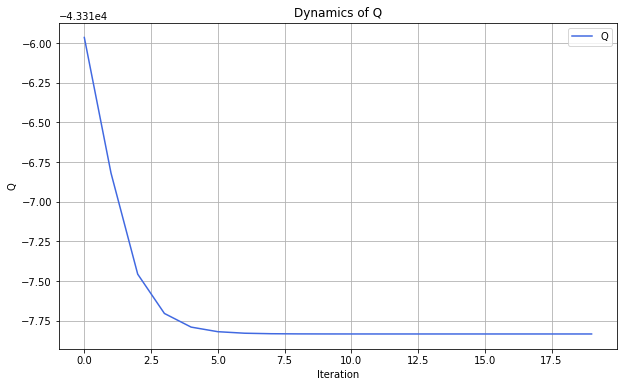

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(losses, label = 'Q', c='royalblue')
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Q")
plt.legend()
plt.title('Dynamics of Q')
plt.show()

<h3> Гистограмма. </h3>

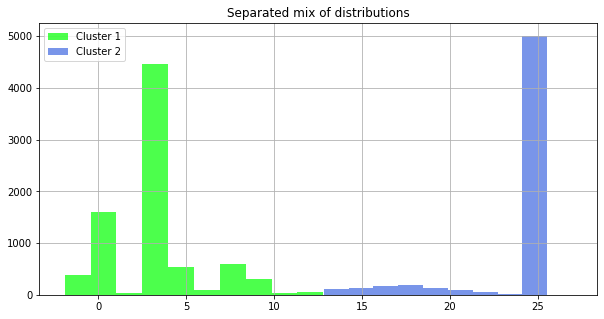

In [110]:
one = pho_normal(x, theta[0], theta[1])
two = pho_normal(x, theta[2], theta[3])
ind_one = [i for i in range(x.shape[0]) if one[i] >= two[i]]
ind_two = [i for i in range(x.shape[0]) if one[i] < two[i]]

plt.figure(figsize = (10, 5))
plt.hist(x[ind_one], alpha=0.7, label='Cluster 1', color='lime')
plt.hist(x[ind_two], alpha=0.7, label='Cluster 2', color='royalblue')
plt.grid()
plt.title('Separated mix of distributions')
plt.legend()
plt.show()

#### Задача 15. Из контрольной прошлого года

В контрольной работе прошлого года была такая задача:

> У меня есть три монетки. Они выпадают орлом с вероятностями $p_1$, $p_2$ и $p_3 = 1$. Я провожу эксперимент из 100 раундов. В каждом раунде я равновероятно выбираю одну из монеток, подбрасываю её два раза и записываю число выпавших орлов. После окончания эксперимента у меня на бумажке остаётся 100 записанных чисел. Какая монетка подкидывалась в каждом раунде, я не помню.

На контрольной требовалось описать EM-алгоритм для нахождения $\hat{p}_1$ и $\hat{p}_2$.

**[а]** **(3 балла)** В файле `15.csv` приведена описанная выборка из 100 чисел. Реализуйте EM-алгоритм для нахождения $\hat{p}_1$ и $\hat{p}_2$.

**[б]** Постройте график $Q$ в зависимости от числа итераций.

**[в]** Изучите выборку и прокомментируйте адекватность полученных оценок.

#### Задача 16. Бутстраппируем!

Исследователь Валентин каждый день ловит покемонов. По причинам, которые Валентин предпочитает не раскрывать, он совершает ровно 15 попыток поймать покемона за день. Каждая попытка может окончиться успехом с некоторой вероятностью. В файле `16.csv` представлены наблюдения о пойманных покемонах за 3 года. 

**[а]** Сделайте предположение о том, какое распределение имеет число пойманных за день покемонов. Это распределение должно иметь один неизвестный параметр.

**[б]** Найдите точечную оценку неизвестного параметра методом максимального правдоподобия.

**[в]** **(2 балла)** Постройте 95%-ый доверительный интервал для неизвестного параметра при помощи методов **Reverse bootstrap percentile**, **t-bootstrap** и **параметрического бутстрэпа**. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB6E3EAD08>]],
      dtype=object)

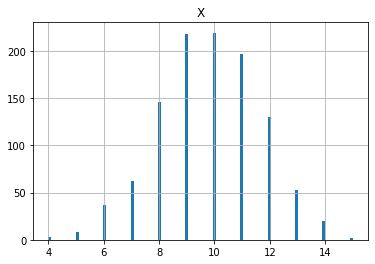

In [5]:
X = pd.read_csv('16.csv')
X.hist('X', bins=100)

In [6]:
x = X['X'].to_numpy()
np.unique(x)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int64)

а) Распределение дискретное. Думаю, $P(X = k) = C_{15}^k \cdot \theta^k \cdot (1 - \theta)^{15 - k}$ - вероятность того, что за день было поймано ровно $k$ покемонов.

б) Пусть n - число элементов в выборке.

$$L = \prod\limits_{k_i} P(X = k_i) = \prod\limits_{k_i} C_{15}^{k_i} \cdot \theta^{k_i} \cdot (1 - \theta)^{15 - k_i} =\theta^{\sum{k_i}} (1 - \theta)^{15n - \sum{k_i}} \cdot \prod\limits_{k_i} C_{15}^{k_i}$$    
<center>Обозначим $C = \prod\limits_{k_i} C_{15}^{k_i}$.</center>
$$\ell = (15n - \sum{k_i}) \cdot ln(1 - \theta) + \sum{k_i} \cdot ln \theta + ln C$$
$$\ell_p' = -\frac{15n - \sum{k_i}}{1 - \theta} + \frac{\sum{k_i}}{\theta} \Longrightarrow \frac{15n - \sum{k_i}}{1 - \hat{\theta}} = \frac{\sum{k_i}}{\hat{\theta}} \Longrightarrow 
15n\hat{\theta} - \sum{k_i}\hat{\theta} = \sum{k_i} - \sum{k_i}\hat{\theta} \Longrightarrow \hat{\theta}_{ML} = \frac{\sum{k_i}}{15n}$$

In [7]:
theta_ml = np.sum(x) / 15 / x.shape[0]
theta_ml

0.6547336377473363

Пункт в):
<h3> Reverse bootstrap percentile. </h3>

1. Генерим выборки с возвращением и считаем статистику (строки 4-5).

In [8]:
np.random.seed(10)
SAMPLES = np.random.choice(x, size = (x.shape[0], 30), replace=True).T
d_star = np.array([np.sum(SAMPLES[row]) / 15 / x.shape[0] 
                             for row in range(30)]) - theta_ml

In [9]:
d_star

array([ 0.00255708, -0.00164384,  0.00121766, -0.00146119,  0.00225266,
       -0.00304414,  0.00487062, -0.00048706, -0.00073059, -0.00645358,
       -0.00407915, -0.00669711,  0.00401826,  0.00127854,  0.00280061,
        0.00085236, -0.00115677, -0.00073059,  0.00487062,  0.00249619,
       -0.00237443, -0.00207002, -0.00121766,  0.00541857,  0.00060883,
        0.00828006,  0.00365297,  0.00109589, -0.00231355,  0.00523592])

2. Определяем квантили.

In [10]:
# \alpha = 5%
d_star_quant = np.quantile(d_star, (0.025, 0.975))
d_star_quant

array([-0.00652055,  0.00620548])

3. Находим ДИ.

In [11]:
LB = theta_ml - d_star_quant[1]
UB = theta_ml - d_star_quant[0]
print('[%.5f; %.5f]' % (LB, UB))

[0.64853; 0.66125]


<h3> t-bootstrap. </h3>

1. Генерим выборки, считаем ошибки и стандартное отклонение.

In [12]:
SAMPLES = np.random.choice(x, size = (x.shape[0], 30), replace=True).T
bootstrap_thetas = np.array([np.sum(SAMPLES[row]) / 15 / x.shape[0] 
                             for row in range(30)])
bootstrap_ses = np.std(SAMPLES)
bootstrap_ses

1.8583807815781148

2. Считаем статистику и определяем квантили.

In [13]:
t_star = (bootstrap_thetas - theta_ml) / bootstrap_ses
t_star_quant = np.quantile(t_star, (0.025, 0.975))
t_star_quant

array([-0.00359554,  0.00339816])

3. Строим ДИ.

In [14]:
LB = theta_ml - t_star_quant[1] * np.std(x)
UB = theta_ml - t_star_quant[0] * np.std(x)
print('[%.5f; %.5f]' % (LB, UB))

[0.64841; 0.66142]


<h3> Параметрический Bootstrap. </h3>

1. Генерим выборку из $Bin(15, \hat{\theta}_{ML}$.

In [20]:
SAMPLES = np.random.binomial(n=15, p=theta_ml, size=(x.shape[0], 30)).T

2. Считаем статистику.

In [21]:
d_star = np.array([np.sum(SAMPLES[row]) / 15 / x.shape[0] 
                             for row in range(30)]) - theta_ml

3. Определяем квантили.

In [22]:
d_star_quant = np.quantile(d_star, (0.025, 0.975))
d_star_quant

array([-0.00604566,  0.00594064])

4. Строим ДИ.

In [23]:
LB = theta_ml - d_star_quant[1]
UB = theta_ml - d_star_quant[0]
print('[%.5f; %.5f]' % (LB, UB))

[0.64879; 0.66078]
